In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.losses import MeanSquaredError
from tensorflow.python.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_absolute_error 
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras_tuner import RandomSearch
from math import sqrt
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
inf_data1 = pd.read_csv(r"C:\Users\meena\OneDrive\Desktop\Documents\Mini_Project_2\Mini_Project2_Data.csv")
inf_data1.head()

season  date_code  weekending      region respiratory_virus  \
0  2009-2010     200940  10-10-2009    Bay Area       Influenza_A   
1  2009-2010     200940  10-10-2009    Bay Area       Influenza_B   
2  2009-2010     200940  10-10-2009    Bay Area   Total_Influenza   
3  2009-2010     200940  10-10-2009    Bay Area               RSV   
4  2009-2010     200940  10-10-2009  California       Influenza_A   

   number_positive  specimens_tested  percent_positive  
0               36               220             16.36  
1                0               220              0.00  
2               36               220             16.36  
3                0               190              0.00  
4             1077              3324             32.40

In [4]:
inf_data1.isnull().sum()

season                  0
date_code               0
weekending              0
region                  0
respiratory_virus       0
number_positive         0
specimens_tested        0
percent_positive     7597
dtype: int64

In [5]:
inf_data1 = inf_data1.dropna()
inf_data1.isnull().sum()

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64

In [6]:
inf_data1['region'].value_counts()

California              7137
Central                 7121
Upper Southern          6999
Bay Area                5817
Lower Southern          5744
Northern                5140
Upper/Lower Southern    4404
Northern/Bay Area         52
Name: region, dtype: int64

In [7]:
inf_data1['season'].value_counts()

2018-2019    6045
2019-2020    6024
2017-2018    5931
2016-2017    5754
2015-2016    5608
2014-2015    4551
2013-2014    3460
2010-2011    1339
2011-2012    1261
2009-2010    1224
2012-2013    1217
Name: season, dtype: int64

In [8]:
inf_data1['respiratory_virus'].value_counts()

Influenza_A                  3668
Influenza_B                  3668
Total_Influenza              3668
RSV                          3641
Enterovirus_Rhinovirus       2322
Total_Parainfluenza          2321
Parainfluenza_UnknownType    2321
Parainfluenza_4              2321
Parainfluenza_3              2321
Parainfluenza_2              2321
Parainfluenza_1              2321
Adenovirus                   2320
HMPV                         2313
Coronavirus_HKU1             1148
Coronavirus_NL63             1148
Coronavirus_OC43             1148
Coronavirus_229E             1148
Coronavirus_UnknownType      1148
Total_Coronavirus            1148
Name: respiratory_virus, dtype: int64

In [9]:
inf_data1 = inf_data1.drop(['date_code'], axis = 1)

In [10]:
pd.set_option('mode.chained_assignment', None)

In [11]:
df1 = inf_data1.loc[inf_data1['respiratory_virus'] == 'Influenza_A'].copy()
df2 = inf_data1.loc[inf_data1["respiratory_virus"] == "RSV"].copy()
df3 = inf_data1.loc[inf_data1["respiratory_virus"] == "Adenovirus"].copy()
df4 = inf_data1.loc[inf_data1["respiratory_virus"] == "HMPV"].copy()

In [12]:
inf_df1 = pd.concat([df2, df1], ignore_index = True, axis = 0)
inf_df2 = pd.concat([inf_df1, df3], ignore_index = True, axis = 0)
inf_df3 = pd.concat([inf_df2, df4], ignore_index = True, axis = 0)
inf_df3.head()

season  weekending             region respiratory_virus  \
0  2009-2010  10-10-2009           Bay Area               RSV   
1  2009-2010  10-10-2009         California               RSV   
2  2009-2010  10-10-2009            Central               RSV   
3  2009-2010  10-10-2009     Lower Southern               RSV   
4  2009-2010  10-10-2009  Northern/Bay Area               RSV   

   number_positive  specimens_tested  percent_positive  
0                0               190              0.00  
1                2              2218              0.09  
2                0               329              0.00  
3                0                35              0.00  
4                2              1510              0.13

In [13]:
inf_df3['respiratory_virus'].value_counts()

Influenza_A    3668
RSV            3641
Adenovirus     2320
HMPV           2313
Name: respiratory_virus, dtype: int64

## ***CALIFORNIA***

In [14]:
df_reg1 = inf_df3.loc[inf_df3['region'] == 'California'].copy()
df_reg1.head()

season  weekending      region respiratory_virus  number_positive  \
1   2009-2010  10-10-2009  California               RSV                2   
8   2009-2010  17-10-2009  California               RSV                8   
14  2009-2010  24-10-2009  California               RSV                1   
20  2009-2010  31-10-2009  California               RSV                8   
26  2009-2010  07-11-2009  California               RSV                5   

    specimens_tested  percent_positive  
1               2218              0.09  
8               2764              0.29  
14              2615              0.04  
20              2085              0.38  
26              1739              0.29

In [15]:
df_reg1_rv1 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Influenza_A']
df_reg1_rv1

season  weekending      region respiratory_virus  number_positive  \
3642  2009-2010  10-10-2009  California       Influenza_A             1077   
3649  2009-2010  17-10-2009  California       Influenza_A             1457   
3655  2009-2010  24-10-2009  California       Influenza_A             1398   
3661  2009-2010  31-10-2009  California       Influenza_A              985   
3667  2009-2010  07-11-2009  California       Influenza_A              811   
...         ...         ...         ...               ...              ...   
7280  2019-2020  29-08-2020  California       Influenza_A                0   
7286  2019-2020  05-09-2020  California       Influenza_A                0   
7292  2019-2020  12-09-2020  California       Influenza_A                0   
7298  2019-2020  19-09-2020  California       Influenza_A                1   
7304  2019-2020  26-09-2020  California       Influenza_A                0   

      specimens_tested  percent_positive  
3642              3324             32.40  
3649              3693             39.45  
3655              3642             38.39  
3661              3013             32.69  
3667              2771             29.27  
...                ...               ...  
7280               398              0.00  
7286               367              0.00  
7292               397              0.00  
7298               463              0.22  
7304               497              0.00  

[573 rows x 7 columns]

### **Influenza A**

In [16]:
import warnings
  

warnings.filterwarnings('ignore')

In [17]:
df_r11 = df_reg1_rv1[['weekending', 'percent_positive']]
df_r11['InfA_PP'] = df_r11['percent_positive']
df_r11 = df_r11.drop(['percent_positive'], axis = 1)
df_r11['Year'] = pd.DatetimeIndex(df_r11['weekending']).year
df_r11.head()

weekending  InfA_PP  Year
3642  10-10-2009    32.40  2009
3649  17-10-2009    39.45  2009
3655  24-10-2009    38.39  2009
3661  31-10-2009    32.69  2009
3667  07-11-2009    29.27  2009

In [18]:
df_r11['InfA_PP'].describe()

count    573.000000
mean       4.990576
std        7.540275
min        0.000000
25%        0.420000
50%        1.150000
75%        6.380000
max       39.450000
Name: InfA_PP, dtype: float64

In [19]:
# plotting scattered graph
fig = px.scatter(df_r11, x='Year', y='InfA_PP')
fig.show()

In [20]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model_r11=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model_r11.fit(df_r11[['InfA_PP']].values)
df_r11['scores']=forest_model_r11.decision_function(df_r11[['InfA_PP']].values)
df_r11['anomaly_value']=forest_model_r11.predict(df_r11[['InfA_PP']].values)
print(df_r11.head(10))
print("Anomaly Values")
print(df_r11['anomaly_value'].value_counts())

      weekending  InfA_PP  Year    scores  anomaly_value
3642  10-10-2009    32.40  2009 -0.183993             -1
3649  17-10-2009    39.45  2009 -0.234632             -1
3655  24-10-2009    38.39  2009 -0.229256             -1
3661  31-10-2009    32.69  2009 -0.187537             -1
3667  07-11-2009    29.27  2009 -0.141793             -1
3674  14-11-2009    19.68  2009  0.009288              1
3681  21-11-2009    14.52  2009  0.004559              1
3688  28-11-2009    12.28  2009  0.010675              1
3695  05-12-2009     9.99  2009  0.031026              1
3702  12-12-2009     8.22  2009  0.020578              1
Anomaly Values
 1    498
-1     75
Name: anomaly_value, dtype: int64


Here, the contamination parameter defines a rough estimate of the percentage of the outliers in our dataset. So, we have assigned contamination to be 10% in our case.

In [21]:
df_r11.set_index('Year', drop = True, inplace = True)
a_r11 = df_r11.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_r11.index.astype(str),y=df_r11['InfA_PP'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_r11.index.astype(str),y=a_r11['InfA_PP'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

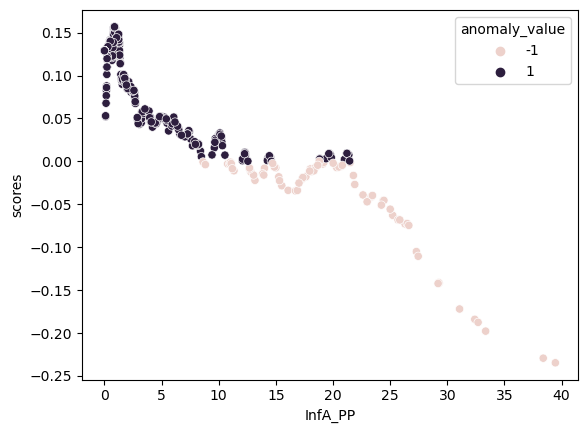

In [22]:
sns.scatterplot(x = 'InfA_PP', y = 'scores', hue = 'anomaly_value', data = df_r11)
plt.show()

## **LSTM MODEL**

In [23]:
df_r11  = df_r11[df_r11.anomaly_value != -1]
df_r11.shape

(498, 4)

In [24]:

df_r11 = df_r11.drop(['weekending','scores', 'anomaly_value'], axis = 1)
df_r11.head()

InfA_PP
Year         
2009    19.68
2009    14.52
2009    12.28
2009     9.99
2009     8.22

In [25]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [26]:
window_size = 5
X_r11, y_r11 = df_to_X_y(df_r11, window_size)
X_r11.shape, y_r11.shape

((493, 5, 1, 1), (493, 1))

In [27]:
X_train_r11, y_train_r11 = X_r11[:250], y_r11[:250]
X_val_r11, y_val_r11 = X_r11[250:400], y_r11[250:400]
X_test_r11, y_test_r11 = X_r11[400:], y_r11[400:]

X_train_r11.shape, y_train_r11.shape, X_test_r11.shape, y_test_r11.shape, X_val_r11.shape, y_val_r11.shape 

((250, 5, 1, 1), (250, 1), (93, 5, 1, 1), (93, 1), (150, 5, 1, 1), (150, 1))

In [28]:

def build_model(hp):                 #hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape=(5, 1)))
    #providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers',2,20)):         
        #providing range for number of neurons in hidden layers
        model.add(Dense(units=hp.Int('num_of_neurons'+ str(i),min_value=32,max_value=512,step=32),
                                    activation='relu'))
    model.add(Dense(1,activation='relu'))    #output layer
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[0.1, 0.01, 0.001, 0.0001])),   #tuning learning rate
                  loss='mae',metrics=[RootMeanSquaredError()])
    return model
    

In [29]:
import keras_tuner as kt
import tensorflow as tf
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_loss",
                     max_epochs=20,
                     directory="kt_dir",
                     project_name="kt_hyperband",)


INFO:tensorflow:Reloading Tuner from kt_dir\kt_hyperband\tuner0.json


In [30]:
# summary of tuner
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
num_of_neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max

In [31]:
# Tunner search
tuner.search(X_train_r11, y_train_r11, epochs = 10, validation_data = (X_val_r11, y_val_r11))
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r11 = optimum_model.fit(X_train_r11, y_train_r11, epochs = nb_epochs,validation_data = (X_val_r11, y_val_r11) ).history



INFO:tensorflow:Oracle triggered exit
Epoch 1/25
8/8 [==============================] - 1s 29ms/step - loss: 1.1113 - root_mean_squared_error: 2.2772 - val_loss: 1.1276 - val_root_mean_squared_error: 2.1034
Epoch 2/25
8/8 [==============================] - 0s 8ms/step - loss: 0.9092 - root_mean_squared_error: 2.0735 - val_loss: 1.0165 - val_root_mean_squared_error: 1.9864
Epoch 3/25
8/8 [==============================] - 0s 8ms/step - loss: 0.8180 - root_mean_squared_error: 1.9625 - val_loss: 1.5008 - val_root_mean_squared_error: 1.9572
Epoch 4/25
8/8 [==============================] - 0s 9ms/step - loss: 0.8026 - root_mean_squared_error: 1.9755 - val_loss: 1.0869 - val_root_mean_squared_error: 1.9294
Epoch 5/25
8/8 [==============================] - 0s 9ms/step - loss: 0.7775 - root_mean_squared_error: 1.9176 - val_loss: 1.3157 - val_root_mean_squared_error: 1.9038
Epoch 6/25
8/8 [==============================] - 0s 8ms/step - loss: 0.7263 - root_mean_squared_error: 1.9077 - val_loss

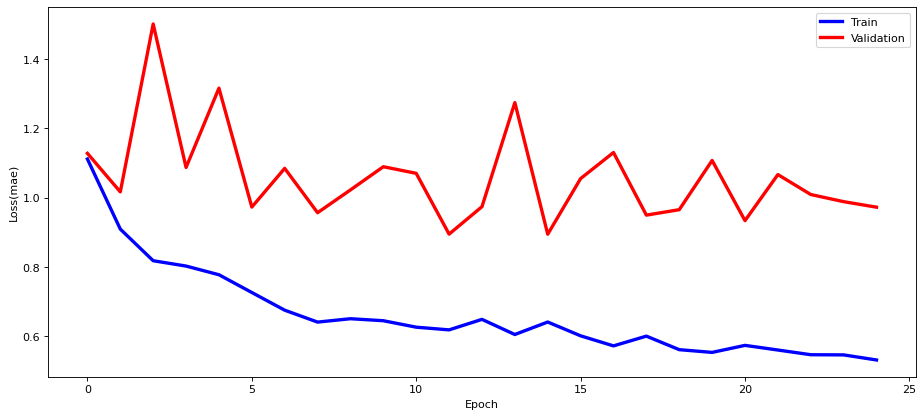

In [32]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r11['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r11['val_loss'], 'r', label = 'Validation', linewidth = 3)
ax.set_title('', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

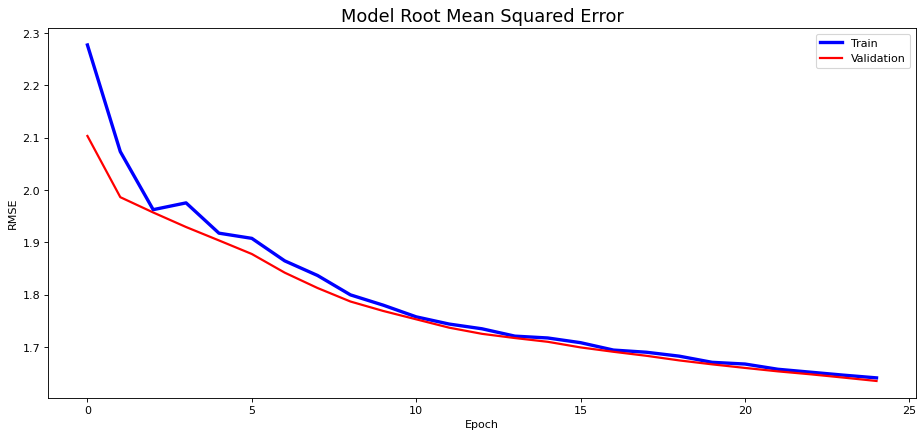

In [33]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r11['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r11['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

3/3 [==============================] - 0s 2ms/step


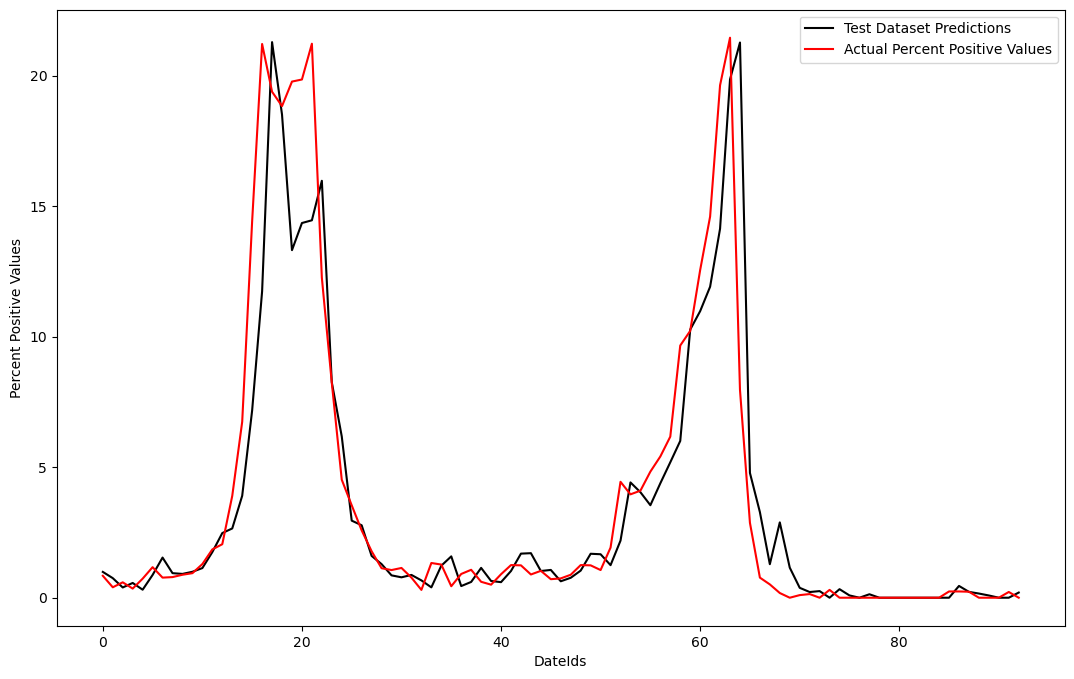

In [34]:
test_pred_r11 = optimum_model.predict(X_test_r11).flatten()
test_results_r11 = pd.DataFrame(data={'Test Predictions': test_pred_r11, 'Actual Percent Positive Values':y_test_r11.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r11['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r11['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [35]:
error_r11= mean_squared_error(y_test_r11, test_pred_r11)
print("RootMeanSquaredError: ", np.sqrt(error_r11))

mae_r11 = mean_absolute_error(y_test_r11, test_pred_r11)
print("Mean Absolute Error: ", mae_r11)


RootMeanSquaredError:  2.45075598651966
Mean Absolute Error:  1.1473543698589008


### SARIMA Model


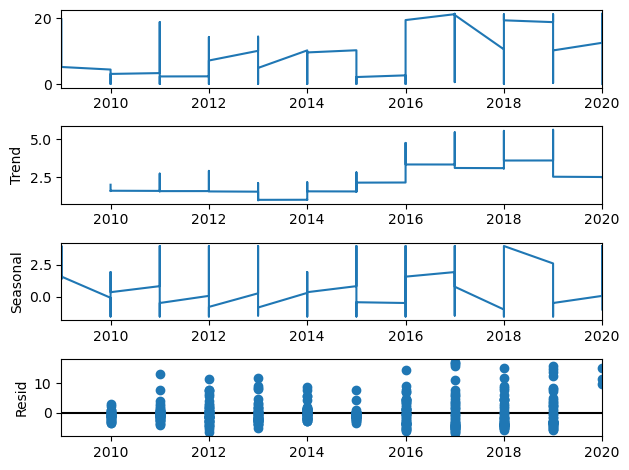

In [36]:
seasonal_decompose(df_r11, model='additive', period = 60).plot();

In [37]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')


In [38]:
adf_test(df_r11['InfA_PP'])

1. ADF :  -6.869809303517266
2. P-Value :  1.5258635262986773e-09
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 495
5. Critical Values :
	 1% :  -3.4436298692815304
	 5% :  -2.867396599893435
	 10% :  -2.5698893429241916
The series is stationary


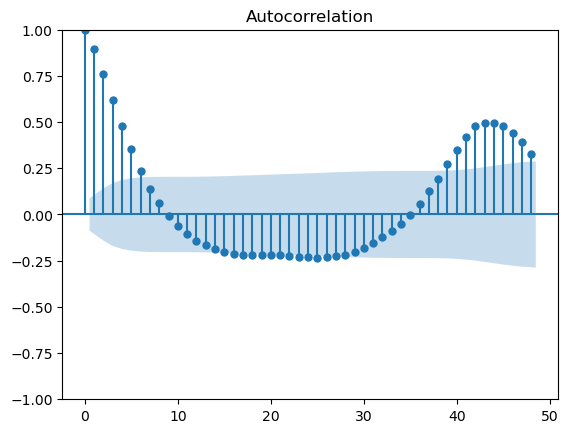

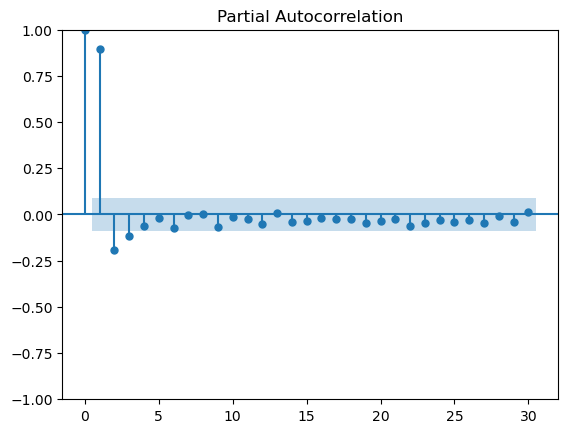

In [39]:
plot_acf(df_r11['InfA_PP'], lags=48);
plot_pacf(df_r11['InfA_PP'], lags=30);

In [40]:
from tqdm import tqdm_notebook

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [41]:
from itertools import product
p = q = P = Q = range(0, 2, 1)
d = 0
D = 0
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

16


In [42]:
import warnings
  

warnings.filterwarnings('ignore')

In [43]:
result_df_r11 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r11['InfA_PP'])
result_df_r11


  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0   (1, 1, 0, 0)  1998.126351
1   (1, 1, 1, 0)  1999.492256
2   (1, 1, 0, 1)  1999.501042
3   (1, 1, 1, 1)  2000.764370
4   (1, 0, 1, 1)  2019.224105
5   (1, 0, 0, 0)  2019.952798
6   (1, 0, 0, 1)  2020.633771
7   (1, 0, 1, 0)  2020.723845
8   (0, 1, 1, 1)  2345.369611
9   (0, 1, 1, 0)  2345.386877
10  (0, 1, 0, 1)  2399.356146
11  (0, 1, 0, 0)  2563.953040
12  (0, 0, 1, 1)  2783.847969
13  (0, 0, 1, 0)  2789.851786
14  (0, 0, 0, 1)  2838.335260
15  (0, 0, 0, 0)  3043.167595

In [44]:
best_model_r11 = SARIMAX(df_r11['InfA_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 4)).fit(dis=-1)
print(best_model_r11.summary())


                               SARIMAX Results                                
Dep. Variable:                InfA_PP   No. Observations:                  498
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -996.063
Date:                Thu, 02 Feb 2023   AIC                           1998.126
Time:                        00:05:02   BIC                           2010.758
Sample:                             0   HQIC                          2003.084
                                - 498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9224      0.009    105.155      0.000       0.905       0.940
ma.L1          0.2113      0.029      7.333      0.000       0.155       0.268
sigma2         3.1828      0.071     44.601      0.0

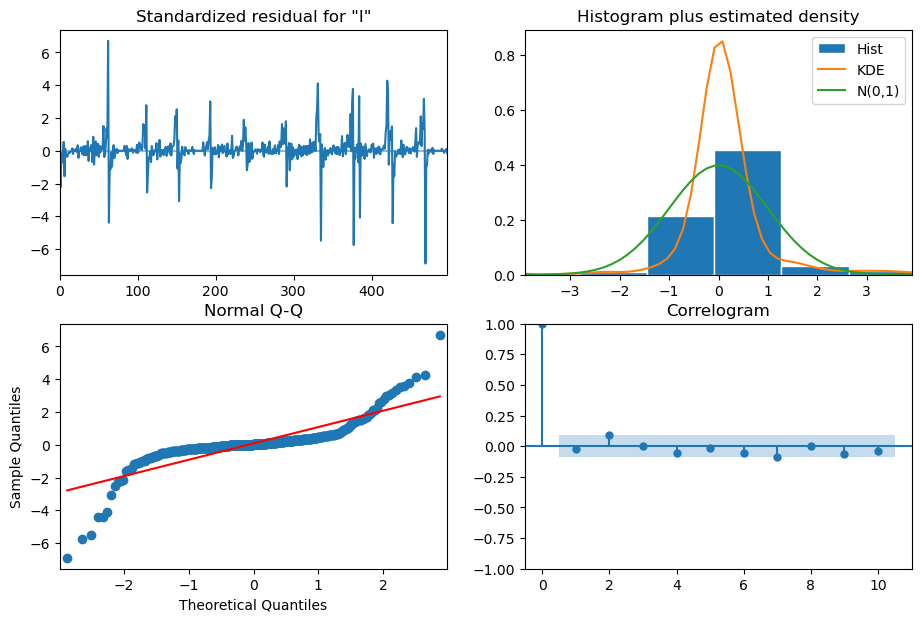

In [45]:
best_model_r11.plot_diagnostics(figsize=(11,7));

In [46]:
pred_r11 = best_model_r11.predict()

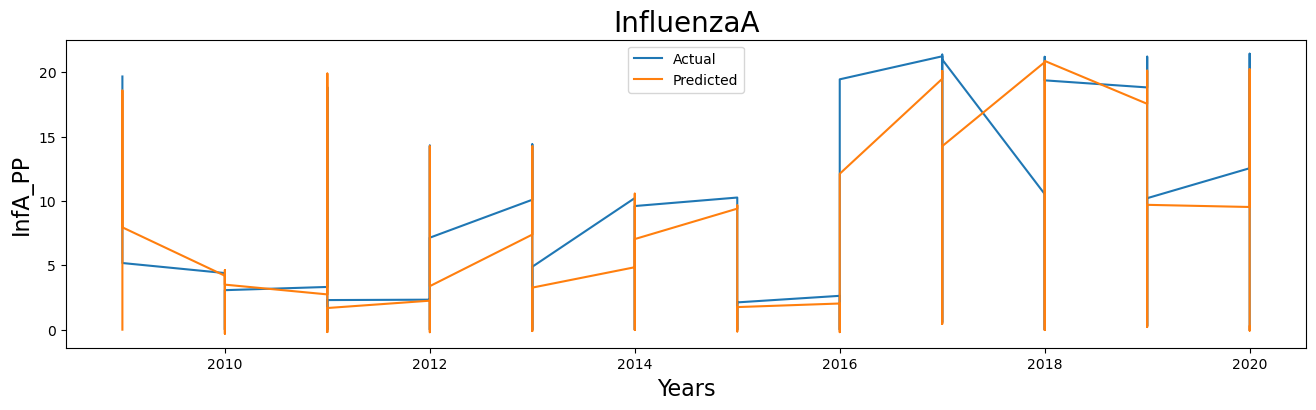

In [47]:
plt.figure(figsize=(16,4))
plt.plot(df_r11['InfA_PP'], label="Actual")
plt.plot(pred_r11, label="Predicted")
plt.title('InfluenzaA', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('InfA_PP', fontsize=16)
plt.legend()

In [48]:
error_r1= mean_squared_error(df_r11['InfA_PP'], pred_r11)
print("RootMeanSquaredError: ", np.sqrt(error_r1))

mae_r1 = mean_absolute_error(df_r11['InfA_PP'], pred_r11)
print("Mean Absolute Error: ", mae_r1)


RootMeanSquaredError:  1.9699836013646643
Mean Absolute Error:  0.8988654630501355


## **RSV**

In [49]:
df_reg1_rv2 = df_reg1.loc[df_reg1['respiratory_virus'] == 'RSV']
df_reg1_rv2

season  weekending      region respiratory_virus  number_positive  \
1     2009-2010  10-10-2009  California               RSV                2   
8     2009-2010  17-10-2009  California               RSV                8   
14    2009-2010  24-10-2009  California               RSV                1   
20    2009-2010  31-10-2009  California               RSV                8   
26    2009-2010  07-11-2009  California               RSV                5   
...         ...         ...         ...               ...              ...   
3612  2019-2020  29-08-2020  California               RSV                0   
3618  2019-2020  05-09-2020  California               RSV                1   
3624  2019-2020  12-09-2020  California               RSV                1   
3630  2019-2020  19-09-2020  California               RSV                1   
3636  2019-2020  26-09-2020  California               RSV                1   

      specimens_tested  percent_positive  
1                 2218              0.09  
8                 2764              0.29  
14                2615              0.04  
20                2085              0.38  
26                1739              0.29  
...                ...               ...  
3612               396              0.00  
3618               361              0.28  
3624               394              0.25  
3630               455              0.22  
3636               492              0.20  

[573 rows x 7 columns]

In [50]:
df_r12 = df_reg1_rv2[['weekending', 'percent_positive']]
df_r12['RSV_PP'] = df_r12['percent_positive']
df_r12 = df_r12.drop(['percent_positive'], axis = 1)
df_r12['Year'] = pd.DatetimeIndex(df_r12['weekending']).year
df_r12.head()

weekending  RSV_PP  Year
1   10-10-2009    0.09  2009
8   17-10-2009    0.29  2009
14  24-10-2009    0.04  2009
20  31-10-2009    0.38  2009
26  07-11-2009    0.29  2009

In [51]:
df_r12['RSV_PP'].describe()

count    573.000000
mean       5.882478
std        7.460155
min        0.000000
25%        0.600000
50%        2.020000
75%        9.660000
max       39.440000
Name: RSV_PP, dtype: float64

In [52]:
# plotting scattered graph
fig = px.scatter(df_r12, x='Year', y='RSV_PP')
fig.show()

In [53]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model_r12=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model_r12.fit(df_r12[['RSV_PP']].values)
df_r12['scores']=forest_model_r12.decision_function(df_r12[['RSV_PP']].values)
df_r12['anomaly_value']=forest_model_r12.predict(df_r12[['RSV_PP']].values)
print(df_r12.head(10))
print("Anomaly Values")
print(df_r12['anomaly_value'].value_counts())

    weekending  RSV_PP  Year    scores  anomaly_value
1   10-10-2009    0.09  2009  0.013627              1
8   17-10-2009    0.29  2009  0.078753              1
14  24-10-2009    0.04  2009  0.005402              1
20  31-10-2009    0.38  2009  0.094570              1
26  07-11-2009    0.29  2009  0.078753              1
33  14-11-2009    0.51  2009  0.086355              1
40  21-11-2009    0.48  2009  0.082661              1
47  28-11-2009    0.96  2009  0.085796              1
54  05-12-2009    2.41  2009  0.032044              1
61  12-12-2009    2.86  2009  0.004528              1
Anomaly Values
 1    498
-1     75
Name: anomaly_value, dtype: int64


In [54]:
df_r12.set_index('Year', drop = True, inplace = True)
a_r12 = df_r12.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_r12.index.astype(str),y=df_r12['RSV_PP'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_r12.index.astype(str),y=a_r12['RSV_PP'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

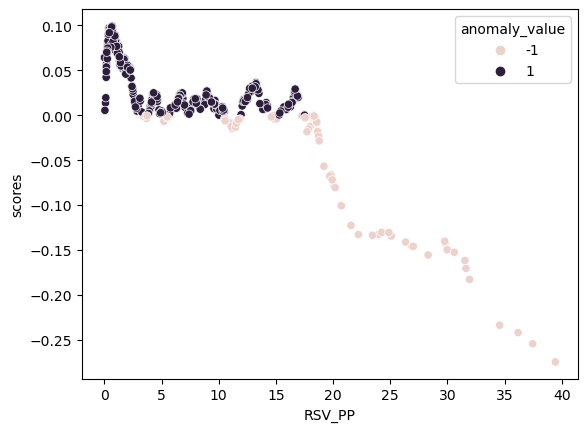

In [55]:
sns.scatterplot(x = 'RSV_PP', y = 'scores', hue = 'anomaly_value', data = df_r12)
plt.show()

In [56]:
df_r12  = df_r12[df_r12.anomaly_value != -1]

In [57]:
df_r12 = df_r12.drop(['weekending','scores', 'anomaly_value'], axis = 1)
df_r12.head()

RSV_PP
Year        
2009    0.09
2009    0.29
2009    0.04
2009    0.38
2009    0.29

In [58]:
rsv_r12 = df_r12.copy()
rsv_r12.head()

RSV_PP
Year        
2009    0.09
2009    0.29
2009    0.04
2009    0.38
2009    0.29

In [59]:
window_size = 5
X_r12, y_r12 = df_to_X_y(df_r12, window_size)
X_r12.shape, y_r12.shape

((493, 5, 1, 1), (493, 1))

In [60]:
X_train_r12, y_train_r12 = X_r12[:250], y_r12[:250]
X_val_r12, y_val_r12 = X_r12[250:400], y_r12[250:400]
X_test_r12, y_test_r12 = X_r12[400:], y_r12[400:]

X_train_r12.shape, y_train_r12.shape, X_test_r12.shape, y_test_r12.shape

((250, 5, 1, 1), (250, 1), (93, 5, 1, 1), (93, 1))

In [61]:
# Tunner search
tuner.search(X_train_r12, y_train_r12, epochs = 10, validation_data = (X_val_r12, y_val_r12))

INFO:tensorflow:Oracle triggered exit


In [62]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r12 = optimum_model.fit(X_train_r12, y_train_r12, epochs = nb_epochs, validation_split= 0.1).history


Epoch 1/25
8/8 [==============================] - 1s 23ms/step - loss: 3.5056 - root_mean_squared_error: 6.2039 - val_loss: 1.5784 - val_root_mean_squared_error: 5.4225
Epoch 2/25
8/8 [==============================] - 0s 7ms/step - loss: 2.1934 - root_mean_squared_error: 4.9074 - val_loss: 0.6478 - val_root_mean_squared_error: 4.4679
Epoch 3/25
8/8 [==============================] - 0s 7ms/step - loss: 1.2795 - root_mean_squared_error: 4.0681 - val_loss: 0.3701 - val_root_mean_squared_error: 3.7972
Epoch 4/25
8/8 [==============================] - 0s 7ms/step - loss: 1.1762 - root_mean_squared_error: 3.5618 - val_loss: 0.3960 - val_root_mean_squared_error: 3.4100
Epoch 5/25
8/8 [==============================] - 0s 8ms/step - loss: 1.0847 - root_mean_squared_error: 3.2543 - val_loss: 0.3612 - val_root_mean_squared_error: 3.1305
Epoch 6/25
8/8 [==============================] - 0s 7ms/step - loss: 1.1774 - root_mean_squared_error: 3.0299 - val_loss: 0.5381 - val_root_mean_squared_error

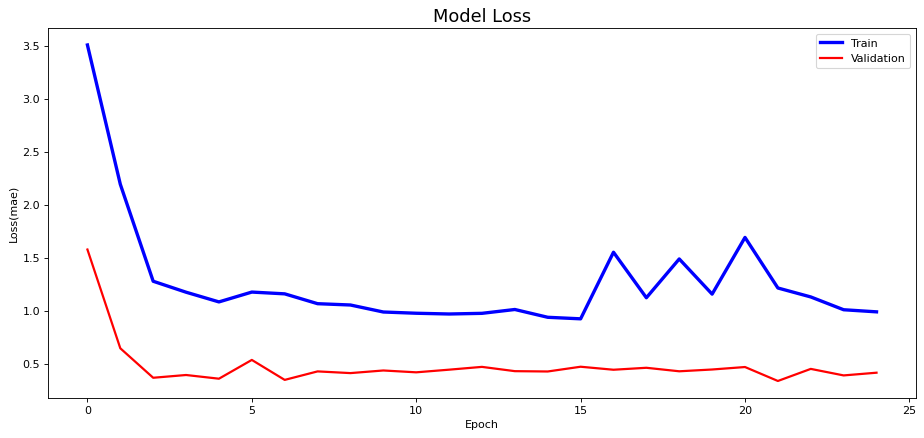

In [63]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r12['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r12['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

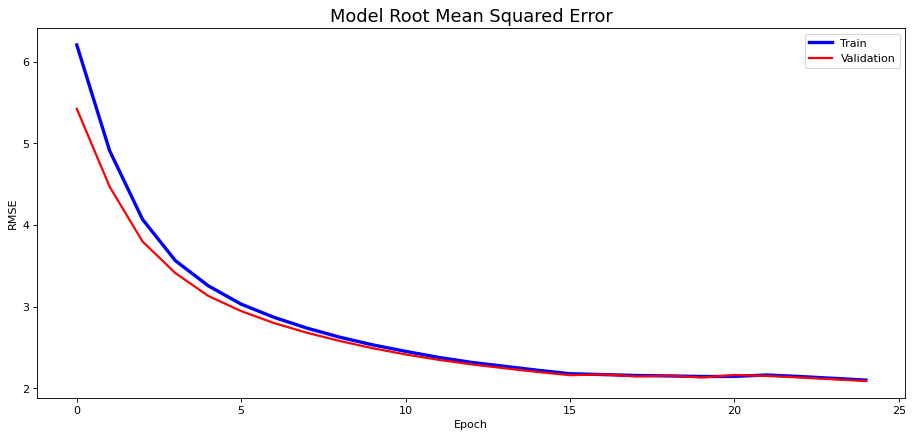

In [64]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r12['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r12['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

3/3 [==============================] - 0s 3ms/step


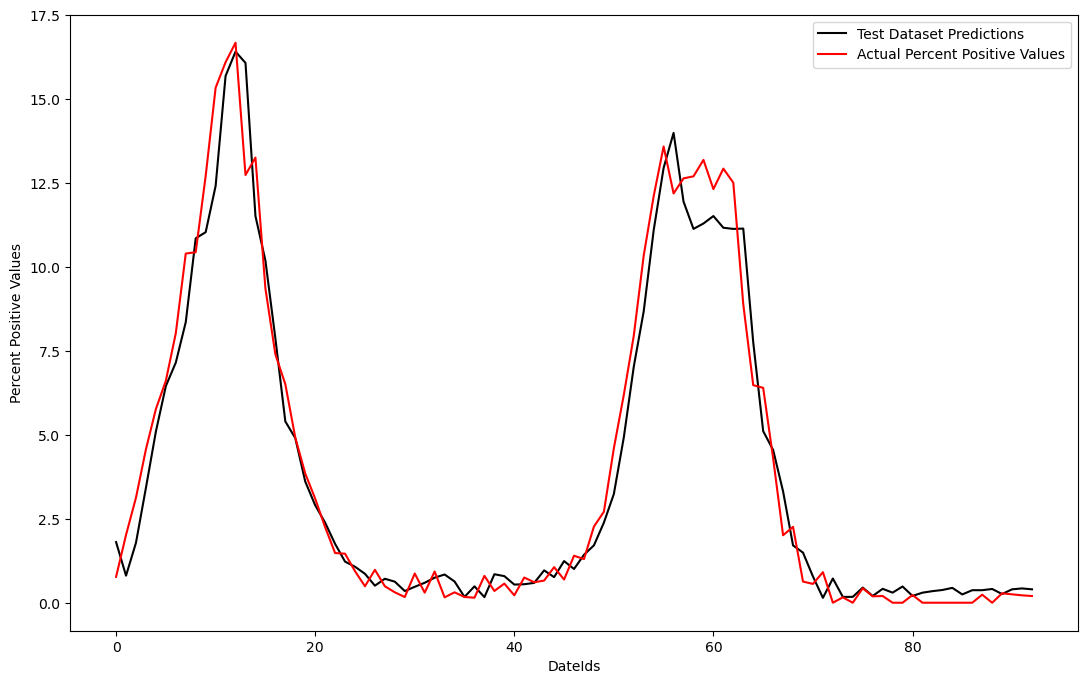

In [65]:
test_pred_r12 = optimum_model.predict(X_test_r12).flatten()
test_results_r12 = pd.DataFrame(data={'Test Predictions': test_pred_r12, 'Actual Percent Positive Values':y_test_r12.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r12['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r12['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [66]:
error_r12= mean_squared_error(y_test_r12, test_pred_r12)
print("RootMeanSquaredError: ", np.sqrt(error_r12))

mae_r12 = mean_absolute_error(y_test_r12, test_pred_r12)
print("Mean Absolute Error: ", mae_r12)


RootMeanSquaredError:  0.9306530758195755
Mean Absolute Error:  0.6648807571267569


### SARIMA Model

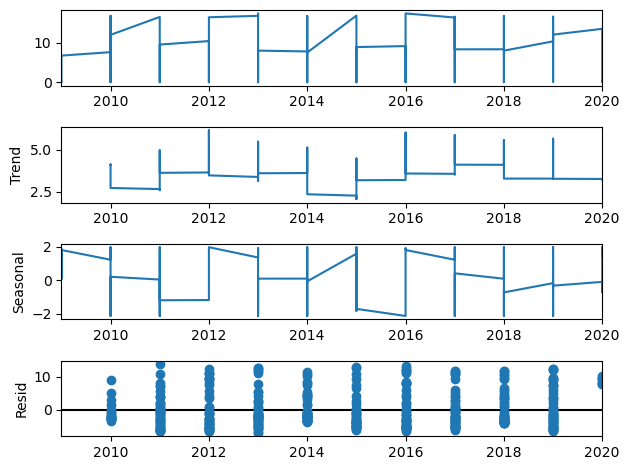

In [67]:
seasonal_decompose(df_r12, model='additive', period=60).plot();

In [68]:
adf_test(df_r12['RSV_PP'])

1. ADF :  -6.756181571048755
2. P-Value :  2.8679239395339184e-09
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression: 489
5. Critical Values :
	 1% :  -3.4437936797256317
	 5% :  -2.867468682890213
	 10% :  -2.5699277594606915
The series is stationary


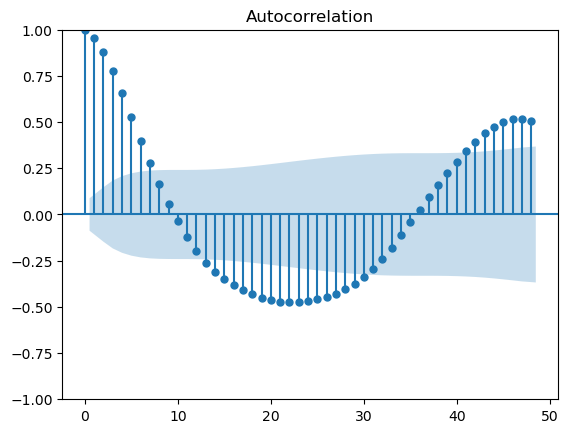

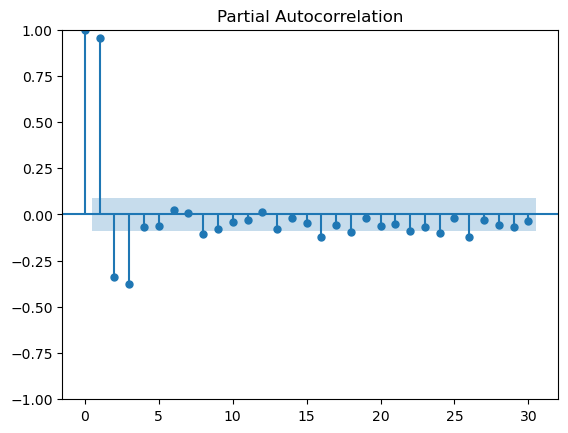

In [69]:
plot_acf(df_r12['RSV_PP'], lags=48);
plot_pacf(df_r12['RSV_PP'], lags=30);

In [70]:
result_df_r12 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r12['RSV_PP'])
result_df_r12

  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0   (1, 1, 0, 1)  1758.334383
1   (1, 1, 1, 0)  1759.328746
2   (1, 1, 1, 1)  1759.793490
3   (1, 1, 0, 0)  1765.359871
4   (1, 0, 0, 1)  1787.279928
5   (1, 0, 1, 1)  1788.597257
6   (1, 0, 1, 0)  1788.628943
7   (1, 0, 0, 0)  1794.471014
8   (0, 1, 1, 1)  2221.468959
9   (0, 1, 1, 0)  2264.409741
10  (0, 1, 0, 1)  2370.685907
11  (0, 0, 1, 1)  2698.272705
12  (0, 1, 0, 0)  2713.548066
13  (0, 0, 1, 0)  2759.631008
14  (0, 0, 0, 1)  2873.045445
15  (0, 0, 0, 0)  3251.289707

In [71]:
best_model_r12 = SARIMAX(df_r12['RSV_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 1, 4)).fit(dis=-1)
print(best_model_r12.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            RSV_PP   No. Observations:                  498
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 4)   Log Likelihood                -875.167
Date:                           Thu, 02 Feb 2023   AIC                           1758.334
Time:                                   00:05:09   BIC                           1775.177
Sample:                                        0   HQIC                          1764.944
                                           - 498                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9538      0.011     90.115      0.000       0.933       0.975
ma.L1          0.2012      0.030      6.597

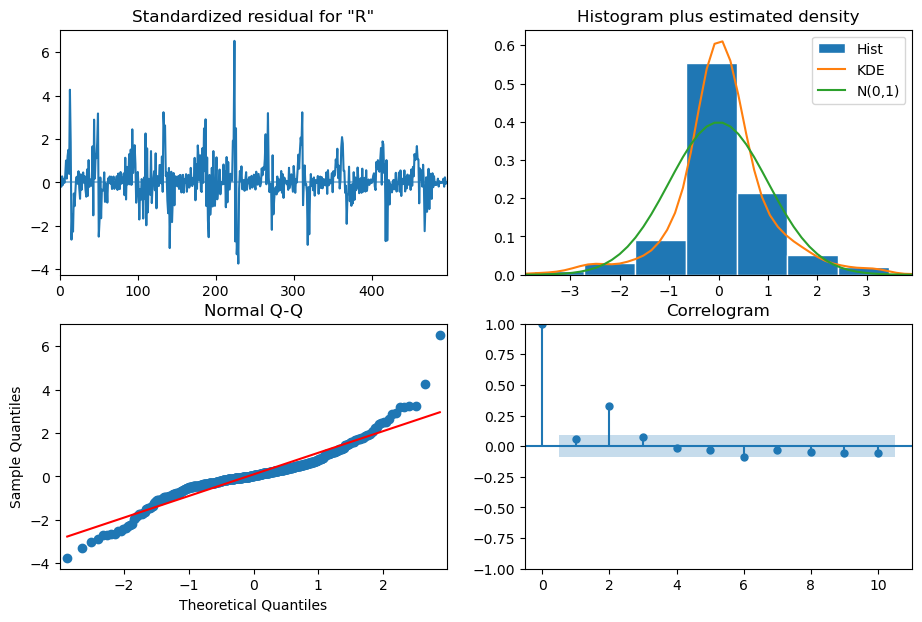

In [72]:
best_model_r12.plot_diagnostics(figsize=(11,7));

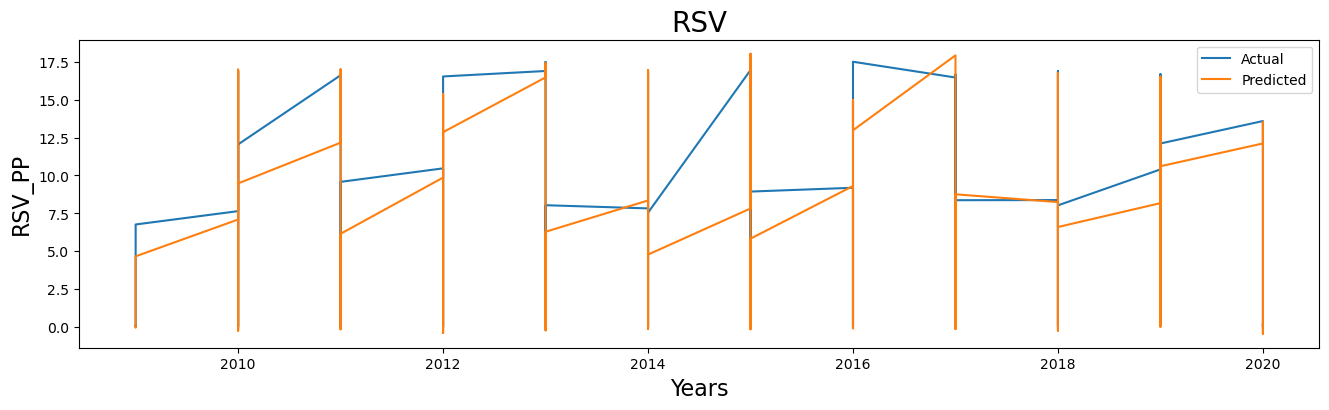

In [73]:
pred_r12 = best_model_r12.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r12['RSV_PP'], label="Actual")
plt.plot(pred_r12, label="Predicted")
plt.title('RSV', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('RSV_PP', fontsize=16)
plt.legend()

In [74]:
error_r2= mean_squared_error(df_r12['RSV_PP'], pred_r12)
print("RootMeanSquaredError: ", np.sqrt(error_r2))

mae_r2 = mean_absolute_error(df_r12['RSV_PP'], pred_r12)
print("Mean Absolute Error: ", mae_r2)


RootMeanSquaredError:  1.3983803166552105
Mean Absolute Error:  0.9134554245296619


## **Adenovirus**

In [75]:
df_reg1_rv3 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Adenovirus']
df_reg1_rv3

season  weekending      region respiratory_virus  number_positive  \
7310  2013-2014  05-10-2013  California        Adenovirus                3   
7314  2013-2014  12-10-2013  California        Adenovirus                7   
7318  2013-2014  19-10-2013  California        Adenovirus                4   
7322  2013-2014  26-10-2013  California        Adenovirus                6   
7326  2013-2014  02-11-2013  California        Adenovirus                9   
...         ...         ...         ...               ...              ...   
9600  2019-2020  29-08-2020  California        Adenovirus                6   
9606  2019-2020  05-09-2020  California        Adenovirus                1   
9612  2019-2020  12-09-2020  California        Adenovirus                4   
9618  2019-2020  19-09-2020  California        Adenovirus                9   
9624  2019-2020  26-09-2020  California        Adenovirus                4   

      specimens_tested  percent_positive  
7310               266              1.13  
7314               276              2.54  
7318               356              1.12  
7322               303              1.98  
7326               345              2.61  
...                ...               ...  
9600               389              1.54  
9606               347              0.29  
9612               373              1.07  
9618               402              2.24  
9624               453              0.88  

[365 rows x 7 columns]

In [76]:
df_r13 = df_reg1_rv3[['weekending', 'percent_positive']]
df_r13['Adeno_PP'] = df_r13['percent_positive']
df_r13 = df_r13.drop(['percent_positive'], axis = 1)
df_r13['Year'] = pd.DatetimeIndex(df_r13['weekending']).year
df_r13.head()

weekending  Adeno_PP  Year
7310  05-10-2013      1.13  2013
7314  12-10-2013      2.54  2013
7318  19-10-2013      1.12  2013
7322  26-10-2013      1.98  2013
7326  02-11-2013      2.61  2013

In [77]:
df_r13['Adeno_PP'].describe()

count    365.000000
mean       2.604082
std        1.431647
min        0.220000
25%        1.610000
50%        2.290000
75%        3.240000
max        8.010000
Name: Adeno_PP, dtype: float64

In [78]:
# plotting scattered graph
fig = px.scatter(df_r13, x='Year', y='Adeno_PP')
fig.show()

In [79]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model_r13=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model_r13.fit(df_r13[['Adeno_PP']].values)
df_r13['scores']=forest_model_r13.decision_function(df_r13[['Adeno_PP']].values)
df_r13['anomaly_value']=forest_model_r13.predict(df_r13[['Adeno_PP']].values)
print(df_r13.head(10))
print("Anomaly Values")
print(df_r13['anomaly_value'].value_counts())

      weekending  Adeno_PP  Year    scores  anomaly_value
7310  05-10-2013      1.13  2013  0.056707              1
7314  12-10-2013      2.54  2013  0.085900              1
7318  19-10-2013      1.12  2013  0.051548              1
7322  26-10-2013      1.98  2013  0.087450              1
7326  02-11-2013      2.61  2013  0.093174              1
7330  09-11-2013      2.60  2013  0.096316              1
7334  16-11-2013      1.33  2013  0.083632              1
7338  23-11-2013      1.61  2013  0.078932              1
7342  30-11-2013      2.47  2013  0.095895              1
7346  07-12-2013      2.10  2013  0.092569              1
Anomaly Values
 1    317
-1     48
Name: anomaly_value, dtype: int64


In [80]:
df_r13.set_index('Year', drop = True, inplace = True)
a_r13 = df_r13.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_r13.index.astype(str),y=df_r13['Adeno_PP'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_r13.index.astype(str),y=a_r13['Adeno_PP'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

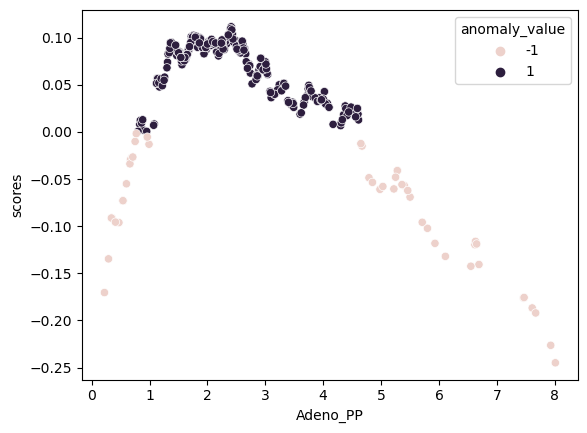

In [81]:
sns.scatterplot(x = 'Adeno_PP', y = 'scores', hue = 'anomaly_value', data = df_r13)
plt.show()

In [82]:
df_r13  = df_r13[df_r13.anomaly_value != -1]

In [83]:
df_r13 = df_r13.drop(['weekending','scores', 'anomaly_value'], axis = 1)
df_r13.head()

Adeno_PP
Year          
2013      1.13
2013      2.54
2013      1.12
2013      1.98
2013      2.61

In [84]:
window_size = 5
X_r13, y_r13 = df_to_X_y(df_r13, window_size)
X_r13.shape, y_r13.shape

((312, 5, 1, 1), (312, 1))

In [85]:
X_train_r13, y_train_r13 = X_r13[:150], y_r13[:150]
X_val_r13, y_val_r13 = X_r13[150:250], y_r13[150:250]
X_test_r13, y_test_r13 = X_r13[250:], y_r13[250:]

X_train_r13.shape, y_train_r13.shape, X_test_r13.shape, y_test_r13.shape,  X_val_r13.shape, y_val_r13.shape

((150, 5, 1, 1), (150, 1), (62, 5, 1, 1), (62, 1), (100, 5, 1, 1), (100, 1))

In [86]:
# Tunner search
tuner.search(X_train_r13, y_train_r13, epochs = 10, validation_data = (X_val_r13, y_val_r13))

INFO:tensorflow:Oracle triggered exit


In [87]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r13 = optimum_model.fit(X_train_r13, y_train_r13, epochs = nb_epochs, validation_split= 0.1).history


Epoch 1/25
5/5 [==============================] - 1s 41ms/step - loss: 1.8263 - root_mean_squared_error: 2.2737 - val_loss: 0.4998 - val_root_mean_squared_error: 1.9667
Epoch 2/25
5/5 [==============================] - 0s 11ms/step - loss: 0.8634 - root_mean_squared_error: 1.6846 - val_loss: 0.5152 - val_root_mean_squared_error: 1.5818
Epoch 3/25
5/5 [==============================] - 0s 12ms/step - loss: 0.6533 - root_mean_squared_error: 1.4513 - val_loss: 0.4772 - val_root_mean_squared_error: 1.3748
Epoch 4/25
5/5 [==============================] - 0s 11ms/step - loss: 0.6323 - root_mean_squared_error: 1.2987 - val_loss: 0.4603 - val_root_mean_squared_error: 1.2528
Epoch 5/25
5/5 [==============================] - 0s 12ms/step - loss: 0.5889 - root_mean_squared_error: 1.1994 - val_loss: 0.4573 - val_root_mean_squared_error: 1.1679
Epoch 6/25
5/5 [==============================] - 0s 11ms/step - loss: 0.5839 - root_mean_squared_error: 1.1298 - val_loss: 0.4654 - val_root_mean_squared_

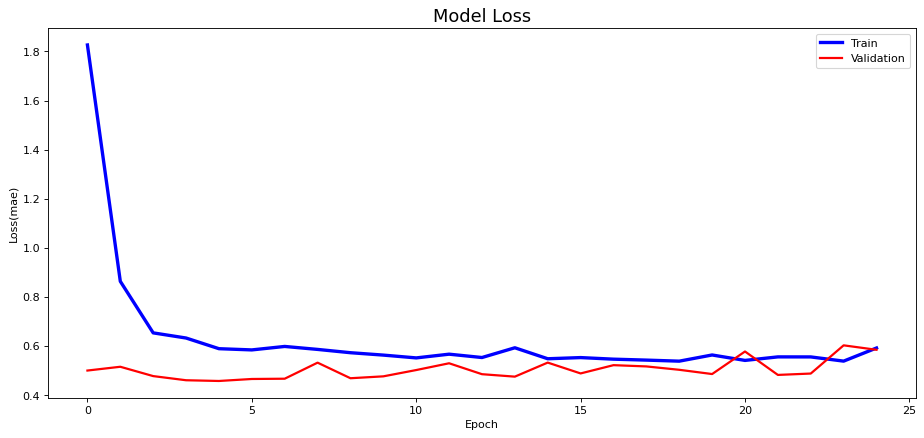

In [88]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r13['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r13['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

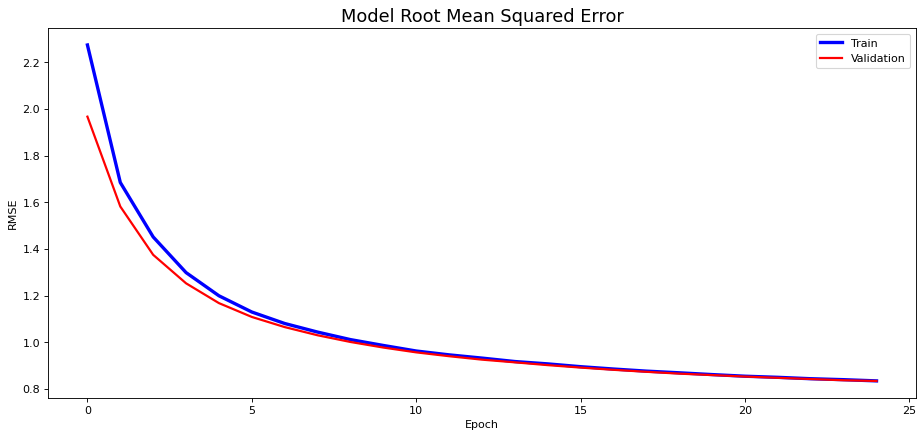

In [89]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r13['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r13['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

2/2 [==============================] - 0s 2ms/step


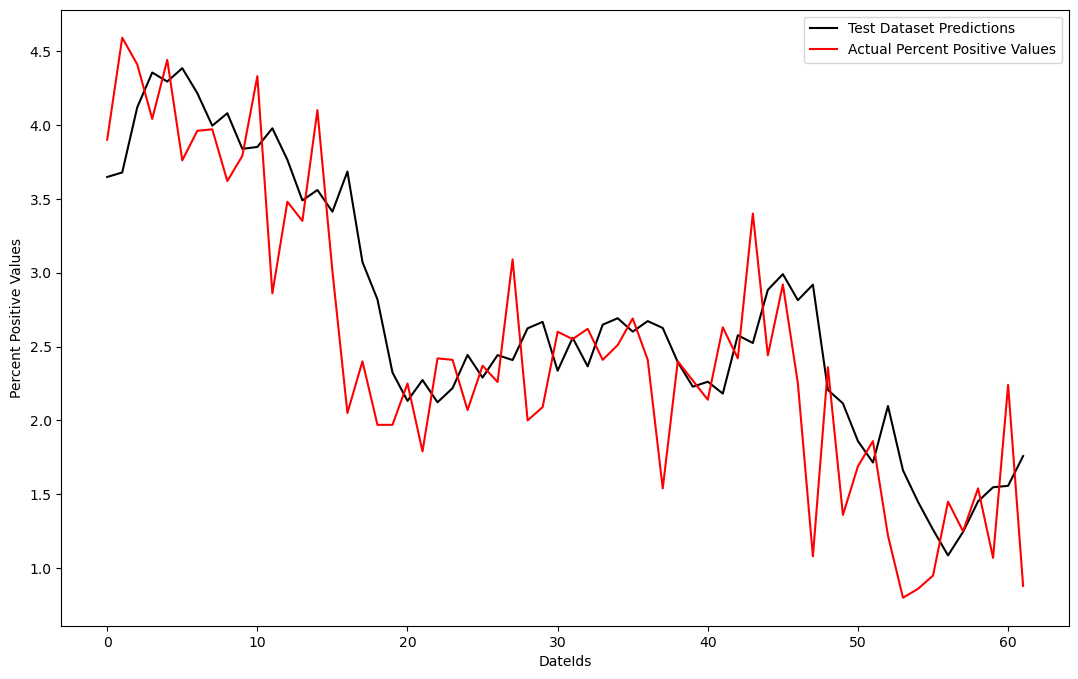

In [90]:
test_pred_r13 = optimum_model.predict(X_test_r13).flatten()
test_results_r13 = pd.DataFrame(data={'Test Predictions': test_pred_r13, 'Actual Percent Positive Values':y_test_r13.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r13['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r13['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [91]:
error_r13= mean_squared_error(y_test_r13, test_pred_r13)
print("RootMeanSquaredError: ", np.sqrt(error_r13))

mae_r13 = mean_absolute_error(y_test_r13, test_pred_r13)
print("Mean Absolute Error: ", mae_r13)


RootMeanSquaredError:  0.569395561472661
Mean Absolute Error:  0.43085051821124176


### SARIMA Model

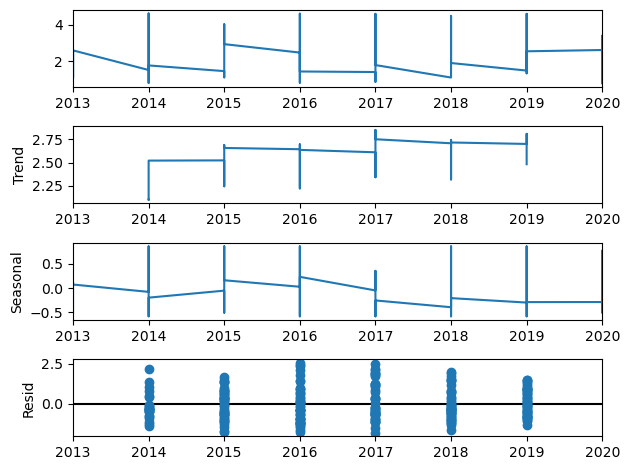

In [92]:
seasonal_decompose(df_r13, model='additive', period=60).plot();

In [93]:
adf_test(df_r13['Adeno_PP'])

1. ADF :  -5.394257298729817
2. P-Value :  3.4825569246287444e-06
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 306
5. Critical Values :
	 1% :  -3.4519023023726696
	 5% :  -2.8710320399170537
	 10% :  -2.57182745012602
The series is stationary


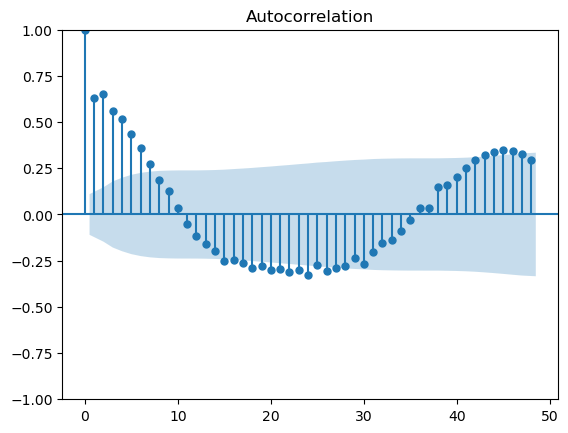

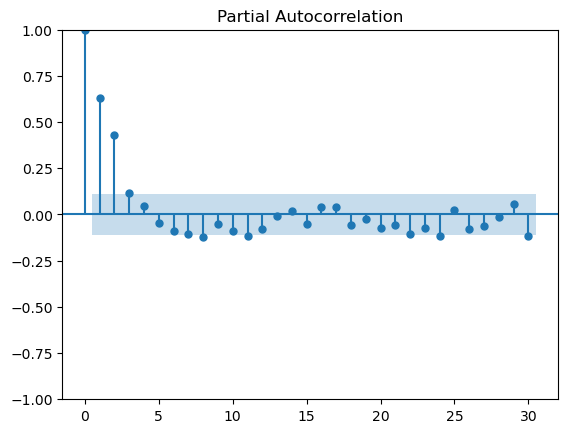

In [94]:
plot_acf(df_r13['Adeno_PP'], lags=48);
plot_pacf(df_r13['Adeno_PP'], lags=30);

In [95]:
result_df_r13 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r13['Adeno_PP'])
result_df_r13

  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0   (1, 1, 0, 1)   669.931030
1   (1, 1, 1, 0)   670.064056
2   (1, 1, 0, 0)   670.730180
3   (1, 1, 1, 1)   673.777058
4   (1, 0, 1, 1)   737.803208
5   (1, 0, 0, 1)   768.302937
6   (1, 0, 1, 0)   768.343530
7   (1, 0, 0, 0)   768.763229
8   (0, 1, 1, 1)   815.025737
9   (0, 1, 1, 0)   832.073236
10  (0, 0, 1, 1)   848.425000
11  (0, 0, 1, 0)   852.023347
12  (0, 1, 0, 1)  1060.043318
13  (0, 0, 0, 1)  1233.483469
14  (0, 1, 0, 0)  1244.562909
15  (0, 0, 0, 0)  1505.621328

In [96]:
best_model_r13 = SARIMAX(df_r13['Adeno_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 1, 4)).fit(dis=-1)
print(best_model_r13.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          Adeno_PP   No. Observations:                  317
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 4)   Log Likelihood                -330.966
Date:                           Thu, 02 Feb 2023   AIC                            669.931
Time:                                   00:05:16   BIC                            684.967
Sample:                                        0   HQIC                           675.937
                                           - 317                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9899      0.007    142.305      0.000       0.976       1.004
ma.L1         -0.5575      0.052    -10.752

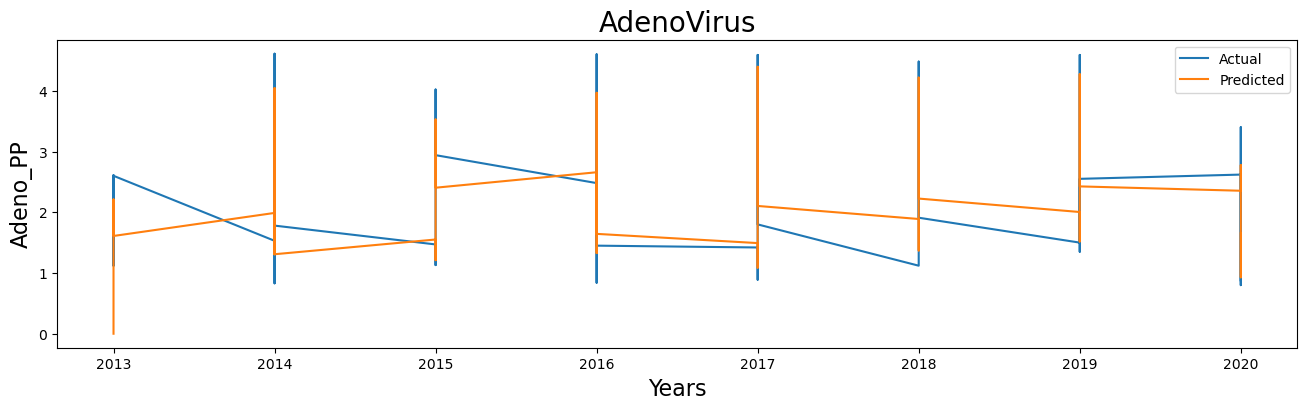

In [97]:
pred_r13 = best_model_r13.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r13['Adeno_PP'], label="Actual")
plt.plot(pred_r13, label="Predicted")
plt.title('AdenoVirus', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Adeno_PP', fontsize=16)
plt.legend()

In [98]:
error_r3= mean_squared_error(df_r13['Adeno_PP'], pred_r13)
print("RootMeanSquaredError: ", np.sqrt(error_r3))

mae_r3 = mean_absolute_error(df_r13['Adeno_PP'], pred_r13)
print("Mean Absolute Error: ", mae_r3)

RootMeanSquaredError:  0.6882176503105228
Mean Absolute Error:  0.5353976591224054


## **HMPV**

In [99]:
df_reg1_rv4 = df_reg1.loc[df_reg1['respiratory_virus'] == 'HMPV']
df_reg1_rv4

season  weekending      region respiratory_virus  number_positive  \
9630   2013-2014  05-10-2013  California              HMPV                3   
9634   2013-2014  12-10-2013  California              HMPV                2   
9638   2013-2014  19-10-2013  California              HMPV                3   
9642   2013-2014  26-10-2013  California              HMPV                2   
9646   2013-2014  02-11-2013  California              HMPV                4   
...          ...         ...         ...               ...              ...   
11913  2019-2020  29-08-2020  California              HMPV                0   
11919  2019-2020  05-09-2020  California              HMPV                0   
11925  2019-2020  12-09-2020  California              HMPV                0   
11931  2019-2020  19-09-2020  California              HMPV                0   
11937  2019-2020  26-09-2020  California              HMPV                0   

       specimens_tested  percent_positive  
9630                266              1.13  
9634                276              0.72  
9638                258              1.16  
9642                292              0.68  
9646                272              1.47  
...                 ...               ...  
11913               389              0.00  
11919               347              0.00  
11925               373              0.00  
11931               402              0.00  
11937               453              0.00  

[365 rows x 7 columns]

In [100]:
df_r14 = df_reg1_rv4[['weekending', 'percent_positive']]
df_r14['HMPV_PP'] = df_r14['percent_positive']
df_r14 = df_r14.drop(['percent_positive'], axis = 1)
df_r14['Year'] = pd.DatetimeIndex(df_r14['weekending']).year
df_r14.head()

weekending  HMPV_PP  Year
9630  05-10-2013     1.13  2013
9634  12-10-2013     0.72  2013
9638  19-10-2013     1.16  2013
9642  26-10-2013     0.68  2013
9646  02-11-2013     1.47  2013

In [101]:
df_r14['HMPV_PP'].describe()

count    365.000000
mean       2.443260
std        2.704417
min        0.000000
25%        0.440000
50%        1.160000
75%        3.800000
max       12.180000
Name: HMPV_PP, dtype: float64

In [102]:
# plotting scattered graph
fig = px.scatter(df_r14, x='Year', y='HMPV_PP')
fig.show()

In [103]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model_r14=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model_r14.fit(df_r14[['HMPV_PP']].values)
df_r14['scores']=forest_model_r14.decision_function(df_r14[['HMPV_PP']].values)
df_r14['anomaly_value']=forest_model_r14.predict(df_r14[['HMPV_PP']].values)
print(df_r14.head(10))
print("Anomaly Values")
print(df_r14['anomaly_value'].value_counts())

      weekending  HMPV_PP  Year    scores  anomaly_value
9630  05-10-2013     1.13  2013  0.078848              1
9634  12-10-2013     0.72  2013  0.099182              1
9638  19-10-2013     1.16  2013  0.074084              1
9642  26-10-2013     0.68  2013  0.090030              1
9646  02-11-2013     1.47  2013  0.054570              1
9650  09-11-2013     2.06  2013  0.057288              1
9654  16-11-2013     2.33  2013  0.036668              1
9658  23-11-2013     3.45  2013  0.035704              1
9662  30-11-2013     2.12  2013  0.066039              1
9666  07-12-2013     4.09  2013 -0.000336             -1
Anomaly Values
 1    317
-1     48
Name: anomaly_value, dtype: int64


In [104]:
df_r14.set_index('Year', drop = True, inplace = True)
a_r14 = df_r14.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_r14.index.astype(str),y=df_r14['HMPV_PP'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_r14.index.astype(str),y=a_r14['HMPV_PP'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

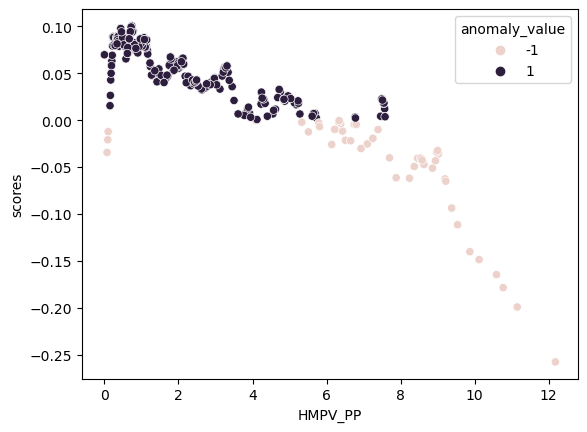

In [105]:
sns.scatterplot(x = 'HMPV_PP', y = 'scores', hue = 'anomaly_value', data = df_r14)
plt.show()

In [106]:
df_r14  = df_r14[df_r14.anomaly_value != -1]

In [107]:
df_r14 = df_r14.drop(['weekending','scores', 'anomaly_value'], axis = 1)
df_r14.head()

HMPV_PP
Year         
2013     1.13
2013     0.72
2013     1.16
2013     0.68
2013     1.47

In [108]:
window_size = 5
X_r14, y_r14 = df_to_X_y(df_r14, window_size)
X_r14.shape, y_r14.shape

((312, 5, 1, 1), (312, 1))

In [109]:
X_train_r14, y_train_r14 = X_r14[:135], y_r14[:135]
X_val_r14, y_val_r14 = X_r14[135:250], y_r14[135:250]
X_test_r14, y_test_r14 = X_r14[250:], y_r14[250:]

X_train_r14.shape, y_train_r14.shape, X_test_r14.shape, y_test_r14.shape, X_val_r14.shape, y_val_r14.shape

((135, 5, 1, 1), (135, 1), (62, 5, 1, 1), (62, 1), (115, 5, 1, 1), (115, 1))

In [110]:
# Tunner search
tuner.search(X_train_r14, y_train_r14, epochs = 10, validation_data = (X_val_r14, y_val_r14))

INFO:tensorflow:Oracle triggered exit


In [111]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r14 = optimum_model.fit(X_train_r14, y_train_r14, epochs = nb_epochs, validation_split = 0.1).history


Epoch 1/25
4/4 [==============================] - 1s 50ms/step - loss: 1.5316 - root_mean_squared_error: 2.4516 - val_loss: 0.2388 - val_root_mean_squared_error: 2.1005
Epoch 2/25
4/4 [==============================] - 0s 12ms/step - loss: 0.8386 - root_mean_squared_error: 1.8363 - val_loss: 0.2148 - val_root_mean_squared_error: 1.6827
Epoch 3/25
4/4 [==============================] - 0s 14ms/step - loss: 0.7851 - root_mean_squared_error: 1.5818 - val_loss: 0.2241 - val_root_mean_squared_error: 1.5158
Epoch 4/25
4/4 [==============================] - 0s 14ms/step - loss: 0.6437 - root_mean_squared_error: 1.4418 - val_loss: 0.3168 - val_root_mean_squared_error: 1.3908
Epoch 5/25
4/4 [==============================] - 0s 15ms/step - loss: 0.6690 - root_mean_squared_error: 1.3446 - val_loss: 0.2651 - val_root_mean_squared_error: 1.3188
Epoch 6/25
4/4 [==============================] - 0s 14ms/step - loss: 0.6823 - root_mean_squared_error: 1.2907 - val_loss: 0.2828 - val_root_mean_squared_

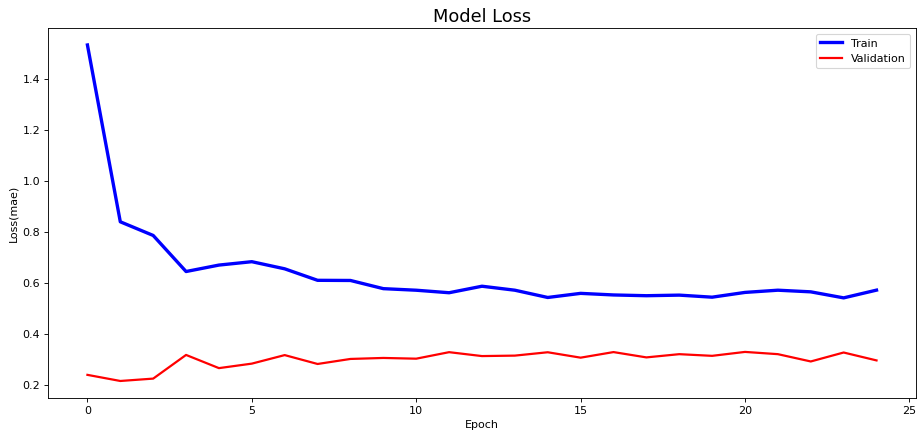

In [112]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r14['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r14['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

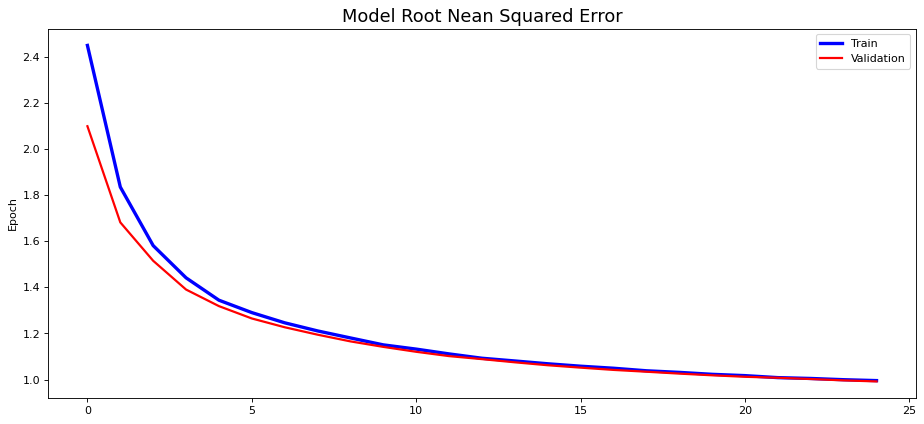

In [113]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r14['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r14['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Nean Squared Error', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_ylabel("Epoch")
ax.legend(loc='upper right')
plt.show()

2/2 [==============================] - 0s 3ms/step


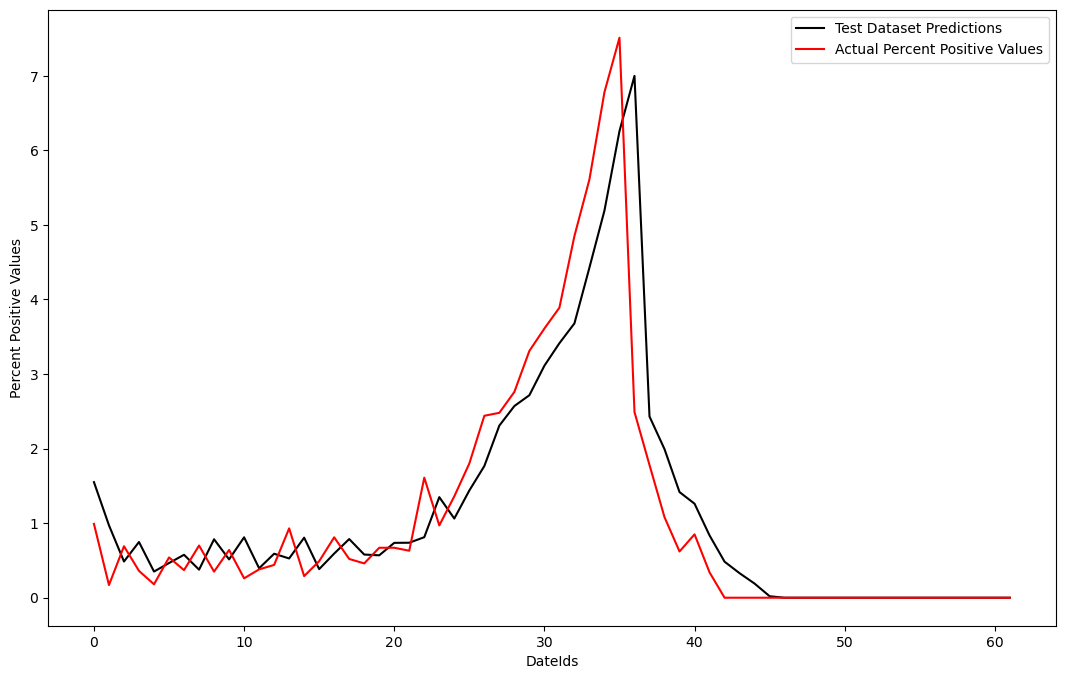

In [114]:
test_pred_r14 = optimum_model.predict(X_test_r14).flatten()
test_results_r14 = pd.DataFrame(data={'Test Predictions': test_pred_r14, 'Actual Percent Positive Values':y_test_r14.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r14['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r14['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [115]:
error_r14= mean_squared_error(y_test_r14, test_pred_r14)
print("RootMeanSquaredError: ", np.sqrt(error_r14))

mae_r14 = mean_absolute_error(y_test_r14, test_pred_r14)
print("Mean Absolute Error: ", mae_r14)


RootMeanSquaredError:  0.7478286043282081
Mean Absolute Error:  0.39254989815575464


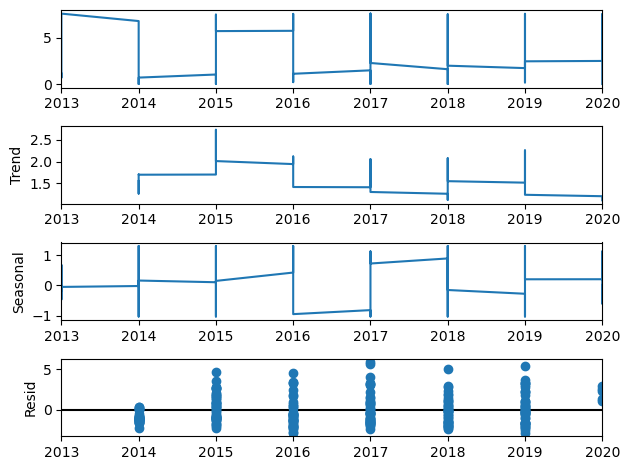

In [116]:
seasonal_decompose(df_r14, model='additive', period=60).plot();

In [117]:
adf_test(df_r14['HMPV_PP'])

1. ADF :  -4.512637777347439
2. P-Value :  0.0001865550807139086
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 313
5. Critical Values :
	 1% :  -3.4514162625887037
	 5% :  -2.8708187088091406
	 10% :  -2.5717136883095675
The series is stationary


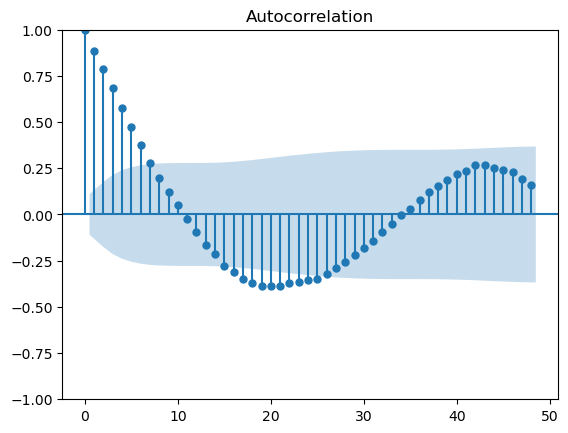

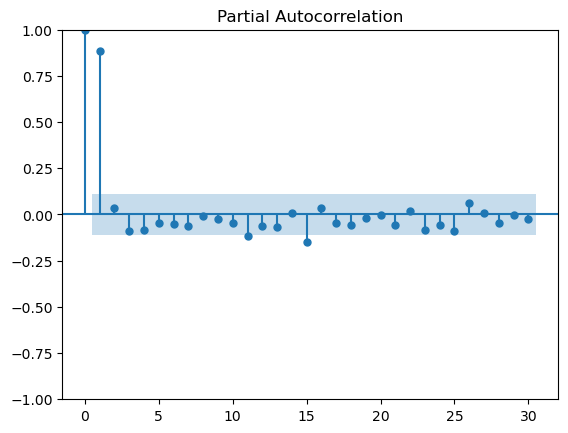

In [118]:
plot_acf(df_r14['HMPV_PP'], lags=48);
plot_pacf(df_r14['HMPV_PP'], lags=30);

In [119]:
result_df_r14 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r14['HMPV_PP'])
result_df_r14

  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0   (1, 0, 0, 0)   807.058293
1   (1, 1, 0, 0)   807.971496
2   (1, 0, 0, 1)   809.055353
3   (1, 0, 1, 0)   809.055457
4   (1, 0, 1, 1)   809.315743
5   (1, 1, 0, 1)   809.971486
6   (1, 1, 1, 0)   809.971487
7   (1, 1, 1, 1)   811.924321
8   (0, 1, 1, 0)   992.039087
9   (0, 1, 1, 1)   993.766219
10  (0, 1, 0, 1)  1062.431670
11  (0, 0, 1, 0)  1191.220354
12  (0, 0, 1, 1)  1191.722381
13  (0, 1, 0, 0)  1200.653271
14  (0, 0, 0, 1)  1295.768977
15  (0, 0, 0, 0)  1482.632171

In [123]:
best_model_r14 = SARIMAX(df_r14['HMPV_PP'], order=(1, 0, 0), seasonal_order=(0, 0, 0, 4)).fit(dis=-1)
print(best_model_r14.summary())

                               SARIMAX Results                                
Dep. Variable:                HMPV_PP   No. Observations:                  317
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -401.529
Date:                Thu, 02 Feb 2023   AIC                            807.058
Time:                        00:06:19   BIC                            814.576
Sample:                             0   HQIC                           810.061
                                - 317                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9371      0.010     92.226      0.000       0.917       0.957
sigma2         0.7326      0.031     23.817      0.000       0.672       0.793
Ljung-Box (L1) (Q):                   1.71   Jarque-

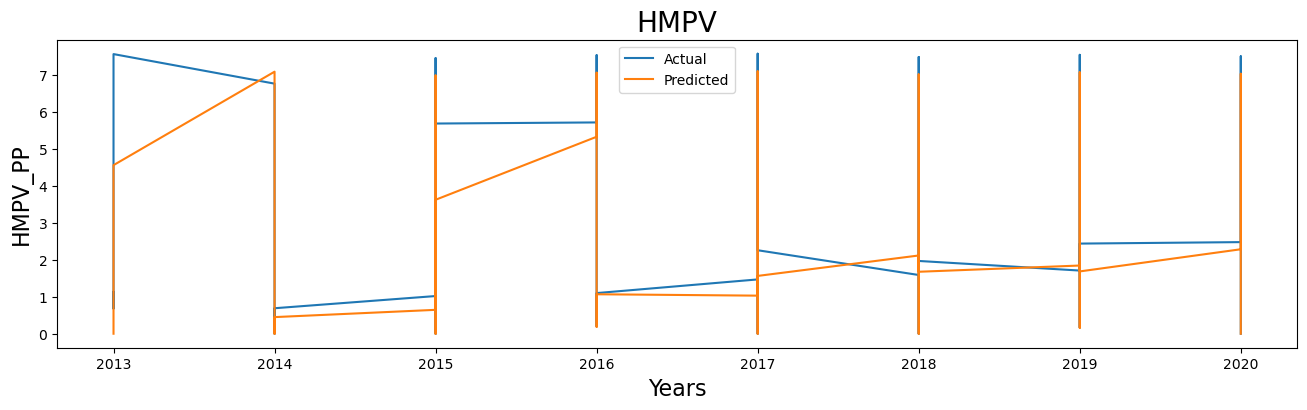

In [124]:
pred_r14 = best_model_r14.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r14['HMPV_PP'], label="Actual")
plt.plot(pred_r14, label="Predicted")
plt.title('HMPV', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('HMPV_PP', fontsize=16)
plt.legend()

In [125]:
error_r4= mean_squared_error(df_r14['HMPV_PP'], pred_r14)
print("RootMeanSquaredError: ", np.sqrt(error_r4))

mae_r4 = mean_absolute_error(df_r14['HMPV_PP'], pred_r14)
print("Mean Absolute Error: ", mae_r4)

RootMeanSquaredError:  0.8579614649395846
Mean Absolute Error:  0.5392016785766139
